<a href="https://colab.research.google.com/github/DanielRios1/stadium-attendance/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
filename = "/content/Country_facts.csv"
df = pd.read_csv(filename)
df_copy= df.copy()
df.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,...,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,...,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,...,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             88 non-null     object 
 1   Region              84 non-null     object 
 2   Population          88 non-null     int64  
 3   Area                88 non-null     int64  
 4   PopDensity          84 non-null     float64
 5   Coastline           84 non-null     float64
 6   Net migration       84 non-null     float64
 7   Infant_mortality    84 non-null     float64
 8   GDP                 84 non-null     float64
 9   Literacy            81 non-null     float64
 10  Phones              83 non-null     float64
 11  Arable              84 non-null     float64
 12  Crops               84 non-null     float64
 13  Other               84 non-null     float64
 14  Climate             74 non-null     float64
 15  Birthrate           83 non-null     float64
 16  Deathrate 

# Limpieza

In [4]:
df.isna().sum()

Country                0
Region                 4
Population             0
Area                   0
PopDensity             4
Coastline              4
Net migration          4
Infant_mortality       4
GDP                    4
Literacy               7
Phones                 5
Arable                 4
Crops                  4
Other                  4
Climate               14
Birthrate              5
Deathrate              5
Agriculture            4
Industry               4
Service                4
FIFA_Rank              0
UEFA_Rank             50
Attendance            36
Home_Away_Contrast     0
dtype: int64

Se encuentra gran cantidad de valores nulos en el dataset.

* Literacy               3 eslovaquia, macedonia, bosnia&herzegovina
* Phones                 1 chipre
* Climate               10 serbia, croacia, marruecos, angola, italia, rusia, moldavia, eslovenia, lituania, libano
* Birthrate              1 serbia
* Deathrate              1 serbia


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
count,8.800000e+01,8.800000e+01,84.000000,84.000000,84.000000,84.00000,84.000000,81.000000,83.000000,84.000000,...,74.000000,83.000000,83.000000,84.000000,84.000000,84.000000,88.000000,38.000000,52.000000,88.000000
mean,5.871520e+07,1.106413e+06,93.734524,1.504048,-0.031429,27.52000,11766.666667,89.270370,258.566265,18.000357,...,2.425676,17.814819,9.447108,0.111488,0.325071,0.563440,62.034091,21.263158,9727.846154,0.260678
std,1.837099e+08,2.557514e+06,93.671773,2.956746,3.054328,30.93839,10201.716526,14.015442,196.338976,14.523808,...,0.796750,9.581969,4.159169,0.112915,0.112414,0.133039,51.070033,13.330891,9403.917482,0.144053
min,7.843010e+05,5.128000e+03,2.600000,0.000000,-10.830000,2.77000,700.000000,42.000000,0.200000,0.460000,...,1.000000,8.250000,2.580000,0.002000,0.110000,0.197000,1.000000,1.000000,316.000000,-0.011744
25%,5.387429e+06,7.013500e+04,27.825000,0.087500,-0.927500,6.75500,3850.000000,86.400000,107.950000,7.162500,...,2.000000,10.395000,6.220000,0.034750,0.258750,0.489750,18.750000,10.250000,3132.250000,0.160488
50%,1.109503e+07,2.923950e+05,70.650000,0.315000,0.000000,20.40500,7500.000000,96.200000,225.300000,13.295000,...,3.000000,14.450000,9.050000,0.075000,0.304000,0.574000,53.000000,20.500000,6323.000000,0.265284
75%,4.060748e+07,9.149795e+05,113.375000,1.007500,0.975000,33.34250,19050.000000,99.000000,402.250000,26.980000,...,3.000000,21.995000,10.580000,0.141250,0.369500,0.670250,82.750000,29.750000,11069.500000,0.330812
max,1.313974e+09,1.707520e+07,397.100000,16.970000,16.290000,191.19000,37800.000000,100.000000,898.000000,56.210000,...,4.000000,49.820000,24.200000,0.550000,0.801000,0.787000,204.000000,51.000000,43534.000000,0.836696


In [ ]:
df[df['Climate'].isnull()]

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
15,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,...,NaN,9.61,11.48,0.070,0.308,0.622,18,17.0,2860.0,0.355599
28,Morocco,NORTHERN AFRICA,33241259,446550,74.4,0.41,-0.98,41.62,4000.0,51.7,...,NaN,21.98,5.58,0.217,0.357,0.426,81,NaN,6195.0,0.313902
30,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,NaN,45.11,24.20,0.096,0.658,0.246,109,NaN,NaN,0.306864
32,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,...,NaN,8.72,10.40,0.021,0.291,0.688,14,4.0,22213.0,0.298578
33,Serbia,EASTERN EUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.0,...,NaN,NaN,NaN,0.166,0.255,0.579,50,27.0,2418.0,0.297211
47,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,...,NaN,9.95,14.65,0.054,0.371,0.575,23,7.0,10155.0,0.256132
49,England,NaN,53000000,130279,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,3.0,36175.0,0.248566
64,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,...,NaN,15.70,12.64,0.213,0.233,0.555,156,34.0,NaN,0.163132
70,Slovenia,EASTERN EUROPE,2010347,20273,99.2,0.23,1.12,4.45,19000.0,99.7,...,NaN,8.98,10.31,0.028,0.369,0.603,54,30.0,1083.0,0.141346
75,Ivory,NaN,24000000,322463,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,0.091704


In [ ]:
df['Deathrate'].value_counts()

10.31    2
9.72     2
7.53     2
5.58     2
16.94    1
        ..
14.27    1
8.68     1
5.78     1
4.45     1
6.21     1
Name: Deathrate, Length: 79, dtype: int64

In [ ]:
x_isna = df['Deathrate'].isna()

In [ ]:
df.loc[x_isna, 'Deathrate']

33   NaN
49   NaN
75   NaN
76   NaN
86   NaN
Name: Deathrate, dtype: float64

In [ ]:
def region_climate_mean(region):
  region_filter  = df['Region'] == region
  values_mean = df[region_filter]['Climate'].mean()
  return values_mean

climate_isna = df['Climate'].isna()

df.loc[climate_isna , 'Climate'] = df.apply(lambda x:region_climate_mean(x['Region']), axis=1 )
df[climate_isna]

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
15,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,...,3.125000,9.61,11.48,0.070,0.308,0.622,18,17.0,2860.0,0.355599
28,Morocco,NORTHERN AFRICA,33241259,446550,74.4,0.41,-0.98,41.62,4000.0,51.7,...,2.000000,21.98,5.58,0.217,0.357,0.426,81,NaN,6195.0,0.313902
30,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,...,1.777778,45.11,24.20,0.096,0.658,0.246,109,NaN,NaN,0.306864
32,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,...,3.071429,8.72,10.40,0.021,0.291,0.688,14,4.0,22213.0,0.298578
33,Serbia,EASTERN EUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,93.0,...,3.125000,NaN,NaN,0.166,0.255,0.579,50,27.0,2418.0,0.297211
47,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,...,2.666667,9.95,14.65,0.054,0.371,0.575,23,7.0,10155.0,0.256132
49,England,NaN,53000000,130279,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9,3.0,36175.0,0.248566
64,Moldova,C.W. OF IND. STATES,4466706,33843,132.0,0.00,-0.26,40.42,1800.0,99.1,...,2.666667,15.70,12.64,0.213,0.233,0.555,156,34.0,NaN,0.163132
70,Slovenia,EASTERN EUROPE,2010347,20273,99.2,0.23,1.12,4.45,19000.0,99.7,...,3.125000,8.98,10.31,0.028,0.369,0.603,54,30.0,1083.0,0.141346
75,Ivory,NaN,24000000,322463,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,0.091704


Se rellenan valores de 'Climate' generando promedios de clima para cada reigón del país respectivo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             88 non-null     object 
 1   Region              84 non-null     object 
 2   Population          88 non-null     int64  
 3   Area                88 non-null     int64  
 4   PopDensity          84 non-null     float64
 5   Coastline           84 non-null     float64
 6   Net migration       84 non-null     float64
 7   Infant_mortality    84 non-null     float64
 8   GDP                 84 non-null     float64
 9   Literacy            81 non-null     float64
 10  Phones              83 non-null     float64
 11  Arable              84 non-null     float64
 12  Crops               84 non-null     float64
 13  Other               84 non-null     float64
 14  Climate             84 non-null     float64
 15  Birthrate           83 non-null     float64
 16  Deathrate 

In [ ]:
df = df[~df['Literacy'].isnull()]
df = df[~df['Phones'].isnull()]
df = df[~df['Birthrate'].isnull()]
df = df[~df['Deathrate'].isnull()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 87
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             79 non-null     object 
 1   Region              79 non-null     object 
 2   Population          79 non-null     int64  
 3   Area                79 non-null     int64  
 4   PopDensity          79 non-null     float64
 5   Coastline           79 non-null     float64
 6   Net migration       79 non-null     float64
 7   Infant_mortality    79 non-null     float64
 8   GDP                 79 non-null     float64
 9   Literacy            79 non-null     float64
 10  Phones              79 non-null     float64
 11  Arable              79 non-null     float64
 12  Crops               79 non-null     float64
 13  Other               79 non-null     float64
 14  Climate             79 non-null     float64
 15  Birthrate           79 non-null     float64
 16  Deathrate 

In [ ]:
df = df.drop(columns=['UEFA_Rank'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 87
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             79 non-null     object 
 1   Region              79 non-null     object 
 2   Population          79 non-null     int64  
 3   Area                79 non-null     int64  
 4   PopDensity          79 non-null     float64
 5   Coastline           79 non-null     float64
 6   Net migration       79 non-null     float64
 7   Infant_mortality    79 non-null     float64
 8   GDP                 79 non-null     float64
 9   Literacy            79 non-null     float64
 10  Phones              79 non-null     float64
 11  Arable              79 non-null     float64
 12  Crops               79 non-null     float64
 13  Other               79 non-null     float64
 14  Climate             79 non-null     float64
 15  Birthrate           79 non-null     float64
 16  Deathrate 

In [ ]:
df.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,...,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,...,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,...,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008


In [ ]:
df1 = df[~df['Attendance'].isnull()]
df2 = df[df['Attendance'].isnull()]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 87
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             32 non-null     object 
 1   Region              32 non-null     object 
 2   Population          32 non-null     int64  
 3   Area                32 non-null     int64  
 4   PopDensity          32 non-null     float64
 5   Coastline           32 non-null     float64
 6   Net migration       32 non-null     float64
 7   Infant_mortality    32 non-null     float64
 8   GDP                 32 non-null     float64
 9   Literacy            32 non-null     float64
 10  Phones              32 non-null     float64
 11  Arable              32 non-null     float64
 12  Crops               32 non-null     float64
 13  Other               32 non-null     float64
 14  Climate             32 non-null     float64
 15  Birthrate           32 non-null     float64
 16  Deathrate 

In [ ]:
df1['ratio_att'] = df1['Attendance']/df1['Population']
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,2.0,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.000038
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,1.0,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.000253
5,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,1.5,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.000684
6,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,1.5,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.000183
9,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,2.0,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.000197


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 2 to 84
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             47 non-null     object 
 1   Region              47 non-null     object 
 2   Population          47 non-null     int64  
 3   Area                47 non-null     int64  
 4   PopDensity          47 non-null     float64
 5   Coastline           47 non-null     float64
 6   Net migration       47 non-null     float64
 7   Infant_mortality    47 non-null     float64
 8   GDP                 47 non-null     float64
 9   Literacy            47 non-null     float64
 10  Phones              47 non-null     float64
 11  Arable              47 non-null     float64
 12  Crops               47 non-null     float64
 13  Other               47 non-null     float64
 14  Climate             47 non-null     float64
 15  Birthrate           47 non-null     float64
 16  Deathrate 

In [ ]:
df1 = df1.reset_index(drop=True)
df1.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,2.0,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.000038
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,1.0,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.000253
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,1.5,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.000684
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,1.5,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.000183
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,2.0,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.000197


In [ ]:
df1['Country'].unique()

array(['Indonesia ', 'Uzbekistan ', 'Bolivia ', 'Peru ', 'Colombia ',
       'Brazil ', 'Venezuela ', 'Croatia ', 'Greece ', 'Norway ',
       'Kazakhstan ', 'Spain ', 'Netherlands ', 'Morocco ', 'Bulgaria ',
       'Italy ', 'Australia ', 'Romania ', 'Chile ', 'Hungary ', 'Iran ',
       'Ecuador ', 'France ', 'Turkey ', 'Sweden ', 'Russia ', 'Belgium ',
       'Thailand ', 'Ukraine ', 'Poland ', 'Finland ', 'Switzerland ',
       'Azerbaijan ', 'Portugal ', 'Mexico ', 'Argentina ', 'India ',
       'Estonia ', 'Paraguay ', 'Denmark ', 'Belarus ', 'Slovenia ',
       'Germany ', 'Uruguay ', 'Japan ', 'Israel ', 'Qatar '],
      dtype=object)

In [ ]:
for i in df1.index:
  df1['Country'][i] = df1['Country'][i].strip()

df1['Country'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Indonesia', 'Uzbekistan', 'Bolivia', 'Peru', 'Colombia', 'Brazil',
       'Venezuela', 'Croatia', 'Greece', 'Norway', 'Kazakhstan', 'Spain',
       'Netherlands', 'Morocco', 'Bulgaria', 'Italy', 'Australia',
       'Romania', 'Chile', 'Hungary', 'Iran', 'Ecuador', 'France',
       'Turkey', 'Sweden', 'Russia', 'Belgium', 'Thailand', 'Ukraine',
       'Poland', 'Finland', 'Switzerland', 'Azerbaijan', 'Portugal',
       'Mexico', 'Argentina', 'India', 'Estonia', 'Paraguay', 'Denmark',
       'Belarus', 'Slovenia', 'Germany', 'Uruguay', 'Japan', 'Israel',
       'Qatar'], dtype=object)

In [ ]:
for i in df1.index:
  df1['Region'][i] = df1['Region'][i].strip()

df1['Region'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['ASIA (EX. NEAR EAST)', 'C.W. OF IND. STATES',
       'LATIN AMER. & CARIB', 'EASTERN EUROPE', 'WESTERN EUROPE',
       'NORTHERN AFRICA', 'OCEANIA', 'NEAR EAST', 'BALTICS'], dtype=object)

1. sacar datos sin ratio
2. train-test con ratio usando todos los modelos vistos
3. debe tener r2 superior a 0.6
4. obtener ratios para paises que no lo tienen y comprobar si se llego a resultados correctos.


In [ ]:
mat_corr = df1.corr()

In [ ]:
mat_corr.sort_values(by="ratio_att")

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att
Home_Away_Contrast,-0.011693,0.134540,-0.284664,-0.122982,-0.279815,0.353055,-0.334201,-0.088639,-0.334095,-0.190686,...,-0.268424,0.291863,-0.151980,0.337931,-0.053428,-0.148716,0.159351,-0.111721,1.000000,-0.364516
Agriculture,0.250146,0.008334,-0.204868,-0.277730,-0.339720,0.768373,-0.706561,-0.422773,-0.686512,0.059967,...,-0.403093,0.675164,-0.180046,1.000000,-0.035950,-0.543919,0.335160,-0.192290,0.337931,-0.339827
Service,-0.101512,-0.057118,0.312030,0.214820,-0.134087,-0.597580,0.563786,0.425990,0.659122,0.169798,...,0.494246,-0.444445,0.277114,-0.543919,-0.819036,1.000000,-0.423608,0.304682,-0.148716,-0.256438
Infant_mortality,0.325457,0.067403,-0.149269,-0.310116,-0.374245,1.000000,-0.711615,-0.501594,-0.726150,-0.052390,...,-0.603664,0.735010,-0.301410,0.768373,0.186134,-0.597580,0.503391,-0.139039,0.353055,-0.216763
Arable,0.297387,-0.207513,0.412441,0.151003,-0.031016,-0.052390,0.017053,-0.007649,0.167058,1.000000,...,0.393811,-0.368914,0.524668,0.059967,-0.243169,0.169798,-0.008433,0.188352,-0.190686,-0.201582
Population,1.000000,0.252115,0.356449,-0.092406,-0.052086,0.325457,-0.214798,-0.559954,-0.262341,0.297387,...,-0.061592,0.227279,-0.080863,0.250146,-0.050424,-0.101512,0.434721,0.405068,-0.011693,-0.185543
Area,0.252115,1.000000,-0.234018,-0.177605,0.006046,0.067403,-0.138003,-0.054381,-0.102574,-0.207513,...,-0.169574,0.014374,0.085368,0.008334,0.062280,-0.057118,-0.000364,0.158290,0.134540,-0.174211
Deathrate,-0.080863,0.085368,0.067371,0.175321,0.009767,-0.301410,0.200546,0.470282,0.407744,0.524668,...,0.577843,-0.722270,1.000000,-0.180046,-0.206650,0.277114,-0.113358,-0.090298,-0.151980,-0.158264
Crops,0.092388,-0.175668,0.188668,0.093884,-0.036768,-0.037217,-0.028591,-0.076892,0.015491,0.211797,...,0.067823,-0.087114,-0.012972,-0.006524,-0.084787,0.075173,0.058313,0.152966,0.190459,-0.155148
Climate,-0.061592,-0.169574,0.227140,0.167880,0.024748,-0.603664,0.360669,0.382919,0.492880,0.393811,...,1.000000,-0.635265,0.577843,-0.403093,-0.312683,0.494246,-0.271239,0.070585,-0.268424,-0.145562


In [ ]:
mat_corr.sort_values(by="ratio_att", ascending=False).head(10)

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att
ratio_att,-0.185543,-0.174211,0.070140,0.234964,0.765732,-0.216763,0.415465,-0.015966,0.222947,-0.201582,...,-0.145562,-0.105921,-0.158264,-0.339827,0.537826,-0.256438,-0.047304,-0.052267,-0.364516,1.000000
Net migration,-0.052086,0.006046,0.165309,0.228861,1.000000,-0.374245,0.502995,-0.004160,0.377150,-0.031016,...,0.024748,-0.330510,0.009767,-0.339720,0.392394,-0.134087,-0.093794,0.092461,-0.279815,0.765732
Industry,-0.050424,0.062280,-0.230913,-0.066492,0.392394,0.186134,-0.188263,-0.217636,-0.315250,-0.243169,...,-0.312683,0.067167,-0.206650,-0.035950,1.000000,-0.819036,0.275149,-0.231168,-0.053428,0.537826
GDP,-0.214798,-0.138003,0.371214,0.376204,0.502995,-0.711615,1.000000,0.398878,0.868114,0.017053,...,0.360669,-0.629389,0.200546,-0.706561,-0.188263,0.563786,-0.339667,0.316808,-0.334201,0.415465
Coastline,-0.092406,-0.177605,0.086325,1.000000,0.228861,-0.310116,0.376204,0.155710,0.368300,0.151003,...,0.167880,-0.292202,0.175321,-0.277730,-0.066492,0.214820,0.030485,-0.126208,-0.122982,0.234964
Phones,-0.262341,-0.102574,0.284657,0.368300,0.377150,-0.726150,0.868114,0.499972,1.000000,0.167058,...,0.492880,-0.757310,0.407744,-0.686512,-0.315250,0.659122,-0.433825,0.278778,-0.334095,0.222947
Other,-0.298387,0.226287,-0.423673,-0.159111,0.035527,0.055964,-0.011625,0.019763,-0.161714,-0.987342,...,-0.386296,0.365693,-0.497886,-0.056088,0.245496,-0.174016,-0.001449,-0.204316,0.150835,0.217272
PopDensity,0.356449,-0.234018,1.000000,0.086325,0.165309,-0.149269,0.371214,-0.081079,0.284657,0.412441,...,0.227140,-0.214483,0.067371,-0.204868,-0.230913,0.312030,0.041495,0.427506,-0.284664,0.070140
Literacy,-0.559954,-0.054381,-0.081079,0.155710,-0.004160,-0.501594,0.398878,1.000000,0.499972,-0.007649,...,0.382919,-0.516665,0.470282,-0.422773,-0.217636,0.425990,-0.386152,-0.104120,-0.088639,-0.015966
FIFA_Rank,0.434721,-0.000364,0.041495,0.030485,-0.093794,0.503391,-0.339667,-0.386152,-0.433825,-0.008433,...,-0.271239,0.364760,-0.113358,0.335160,0.275149,-0.423608,1.000000,-0.221001,0.159351,-0.047304


In [ ]:
df1['ratio_att'].describe()

count    47.000000
mean      0.000578
std       0.000866
min       0.000025
25%       0.000174
50%       0.000294
75%       0.000656
max       0.005730
Name: ratio_att, dtype: float64

In [ ]:
df1['ratio_att'] = df1['ratio_att']*1000
df1['ratio_att'].describe()

count    47.000000
mean      0.577747
std       0.865823
min       0.024854
25%       0.173959
50%       0.294441
75%       0.656434
max       5.729879
Name: ratio_att, dtype: float64

# Visualizaciones

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             47 non-null     object 
 1   Region              47 non-null     object 
 2   Population          47 non-null     int64  
 3   Area                47 non-null     int64  
 4   PopDensity          47 non-null     float64
 5   Coastline           47 non-null     float64
 6   Net migration       47 non-null     float64
 7   Infant_mortality    47 non-null     float64
 8   GDP                 47 non-null     float64
 9   Literacy            47 non-null     float64
 10  Phones              47 non-null     float64
 11  Arable              47 non-null     float64
 12  Crops               47 non-null     float64
 13  Other               47 non-null     float64
 14  Climate             47 non-null     float64
 15  Birthrate           47 non-null     float64
 16  Deathrate 

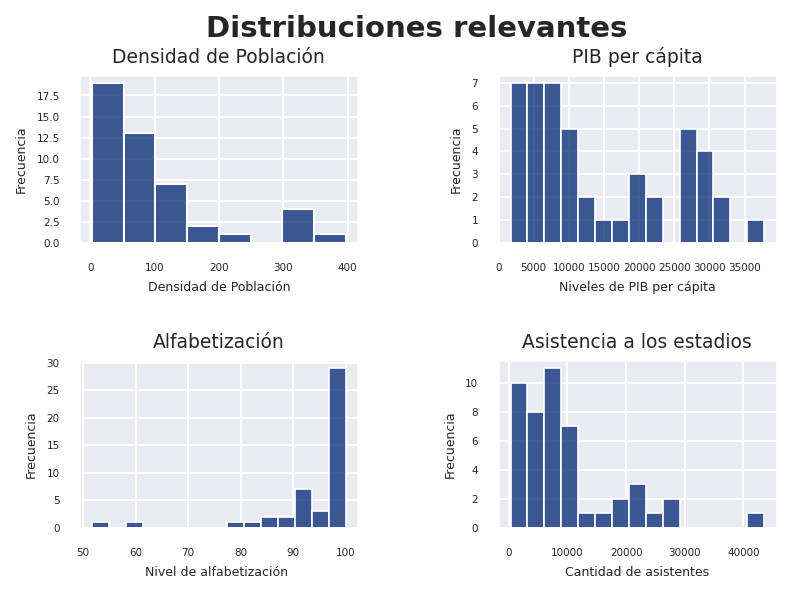

In [ ]:
fig = plt.figure(dpi=150)
fig.suptitle("Distribuciones relevantes", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=.7, wspace=.5)
sns.set(style="darkgrid")

#fig1
ax = fig.add_subplot(2,2,1)
ax.set_title("Densidad de Población", fontsize=9)
sns.histplot(df1["PopDensity"], color="#002674")
ax.set_xlabel("Densidad de Población", fontsize=6)
ax.set_ylabel("Frecuencia", fontsize=6)
ax.tick_params(axis="x", labelsize=5)
ax.tick_params(axis="y", labelsize=5)


#fig2
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("PIB per cápita", fontsize=9)
sns.histplot(df1["GDP"], bins=15, color="#002674")
ax2.set_xlabel('Niveles de PIB per cápita', fontsize=6)
ax2.set_ylabel("Frecuencia", fontsize=6)
ax2.tick_params(axis="x", labelsize=5)
ax2.tick_params(axis="y", labelsize=5)

#fig3
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Alfabetización", fontsize=9)
sns.histplot(df1["Literacy"], bins=15, color="#002674")
ax3.set_xlabel("Nivel de alfabetización ", fontsize=6)
ax3.set_ylabel("Frecuencia", fontsize=6)
ax3.tick_params(axis="x", labelsize=5)
ax3.tick_params(axis="y", labelsize=5)

#fig4
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Asistencia a los estadios", fontsize=9)
sns.histplot(df1["Attendance"], bins=15, color="#002674")
ax4.set_xlabel("Cantidad de asistentes", fontsize=6)
ax4.set_ylabel("Frecuencia", fontsize=6)
ax4.tick_params(axis="x", labelsize=5)
ax4.tick_params(axis="y", labelsize=5)

# plt.tight_layout()
plt.savefig("dist_relev.png", dpi = 300)

plt.show();

* En el dataset se encuentran países que en general tienen baja densidad poblacional. Sólo hay algunos valores extremos cercanos a 400.
* El rango en que se mueve el PIB per cápita del dataset es bastante amplio, desde los 5.000 a los 350.000 USD. La mayor frecuencia se encuentra en los valores por debajo de 10.000 USD.
* Respecto a la alfabetización, vemos que la mayoría del dataset, se ubica por sobre 80. Existen algunos valores extremos cercanos a 50 y 60.
* En tanto en lo que respecta a asistencia a los estadios, las mayores frecuencias se encuentran por debajo de los 10.000 asistentes.

In [ ]:
import plotly.express as px

fig = plt.figure(figsize=(18,6))
fig = px.scatter(df1, x='FIFA_Rank', y='Attendance', color='Country', title='Asistencia a los estadios según Ranking FIFA, por país');


fig.show()

<Figure size 1296x432 with 0 Axes>

En este gráfico se observa la relación entre el Ranking FIFA y la cantidad de asistentes a los estadios. Se ve que existe una relación muy leve, observable en los países que están por sobre los 15k promedio de asistentes, ya que casi todos se ubican dentro de las 30 mejores selecciones del mundo.

In [ ]:
import plotly.express as px

fig = plt.figure(figsize=(18,6))
fig = px.scatter(df1, x='FIFA_Rank', y='Attendance', color='Region', hover_name='Country', title='Asistencia a los estadios según Ranking FIFA, por región');


fig.show()

<Figure size 1296x432 with 0 Axes>

Igual al gráfico anterior, pero observando las regiones a las que pertenecen los paises. Se ve que en general los países de Europa Occidental, presentan cierta relación entre el aumento en el Ranking FIFA y el aumento en la asistencia a los estadios. Además se trata en general de selecciones con mucha historia en el fútbol.
Un caso similar se observa en Latinoamérica, donde los paises con selecciones más poderosas presentan mayor asistencia a los estadios en sus respectivas ligas.

In [ ]:
g1 = df1.groupby(['Region'])[["Attendance"]].sum()
g1

,Attendance
Region,
ASIA (EX. NEAR EAST),69958.0
BALTICS,316.0
C.W. OF IND. STATES,30915.0
EASTERN EUROPE,20257.0
LATIN AMER. & CARIB,104659.0
NEAR EAST,19735.0
NORTHERN AFRICA,6195.0
OCEANIA,13050.0
WESTERN EUROPE,195681.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



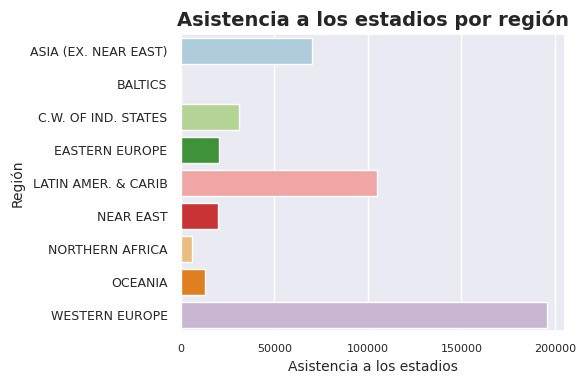

In [ ]:
plt.figure(dpi=100)
sns.set_style('darkgrid')

sns.barplot(g1['Attendance'], g1.index, ci=None, palette='Paired')
plt.xlabel('Asistencia a los estadios', fontsize=10)
plt.ylabel('Región', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.title('Asistencia a los estadios por región', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("asistxregion.png", dpi = 300)
plt.show()

En este gráfico se puede ver que Europa Occidental es por lejos la región que más gente lleva a los estadios, seguida por Latinoamérica y el caribe.

In [ ]:
g2 = df1.groupby(['Country'])[["Attendance"]].sum().sort_values('Attendance', ascending=False).head(10)
g2

,Attendance
Country,
Germany,43534.0
India,27224.0
Spain,27021.0
Mexico,25700.0
France,22368.0
Italy,22213.0
Argentina,21374.0
Netherlands,18744.0
Japan,17803.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



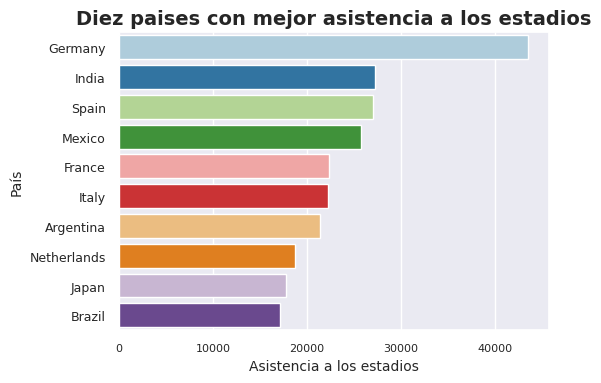

In [ ]:
plt.figure(dpi=100)
sns.set_style('darkgrid')

sns.barplot(g2['Attendance'], g2.index, ci=None, palette='Paired')
plt.xlabel('Asistencia a los estadios', fontsize=10)
plt.ylabel('País', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=9)
plt.title('Diez paises con mejor asistencia a los estadios', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig("asistxpais.png", dpi = 300)
plt.show()

En este gráfico se pueden ver los 10 países cuyas ligas son las que más gente llevan a los estadios. La lista la encabeza por amplio margen Alemania, seguida de India y España.

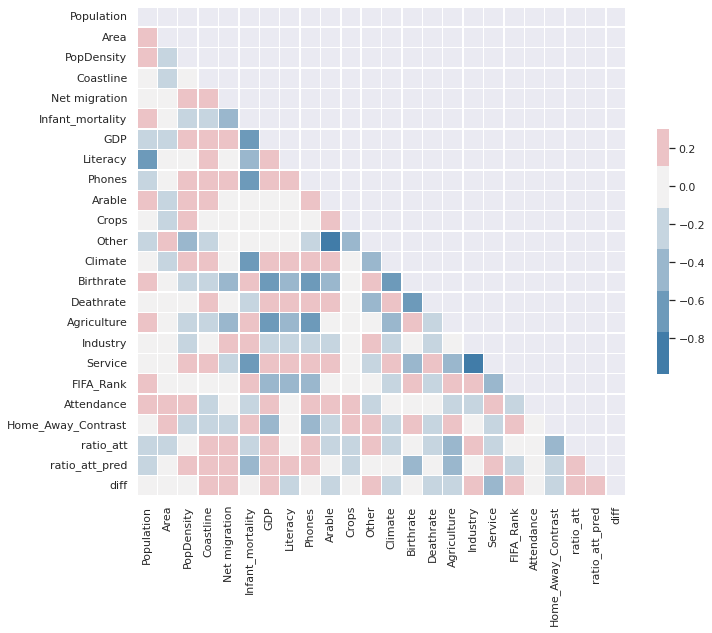

In [ ]:
correlation= df1.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation, annot=False, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# Modelos

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             47 non-null     object 
 1   Region              47 non-null     object 
 2   Population          47 non-null     int64  
 3   Area                47 non-null     int64  
 4   PopDensity          47 non-null     float64
 5   Coastline           47 non-null     float64
 6   Net migration       47 non-null     float64
 7   Infant_mortality    47 non-null     float64
 8   GDP                 47 non-null     float64
 9   Literacy            47 non-null     float64
 10  Phones              47 non-null     float64
 11  Arable              47 non-null     float64
 12  Crops               47 non-null     float64
 13  Other               47 non-null     float64
 14  Climate             47 non-null     float64
 15  Birthrate           47 non-null     float64
 16  Deathrate 

## REGL

In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
X_train

array([[ 1.06922212e+00,  1.18249343e-01, -3.33727629e-01,
        -4.38273890e-01, -1.85234127e+00,  2.21924604e-01,
        -4.74132497e-01, -3.03592995e-01, -7.09590301e-01,
        -2.86447834e-01, -3.15293691e-01,  3.28169508e-01,
        -1.41014949e+00,  1.17861984e+00, -1.35575182e+00,
        -6.16485452e-01, -1.02166946e+00,  1.16328442e+00,
        -5.93828425e-01,  1.72418490e+00, -7.17820241e-01],
       [ 3.25072210e-01, -3.12643172e-01,  4.43900751e-01,
        -3.87471030e-01,  2.28624686e-02,  1.93078179e-01,
        -6.28852597e-01, -2.59434014e-01, -1.11958207e+00,
         9.59941677e-01,  1.48264404e+00, -1.18580282e+00,
        -7.55941372e-01, -4.67719654e-02, -6.06683928e-01,
         2.29178359e-01,  1.43404780e+00, -1.19866485e+00,
         1.78768714e+00, -3.76985530e-01, -3.16276875e-01],
       [-5.62738512e-01, -3.80720969e-01, -4.06903333e-01,
        -3.36668171e-01, -3.28088457e+00,  4.06407554e-01,
        -1.02532286e+00, -2.70473759e-01, -1.02540240e

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_) 

El bias calculado es 0.4173976452142254
La pendiente calculada es:  [-4.65477942e-03 -9.10998367e-02 -6.01061421e-02 -9.08275498e-02
 -3.78446961e-02 -6.82842164e-02  4.13095332e-01 -2.78646985e-02
  1.21359495e-01  4.48172581e+02  9.77467769e+01  4.85005040e+02
  5.25338818e-03  4.38686422e-01  1.93334698e-01  2.61889248e+01
  2.71153133e+01  3.73452824e+01 -5.45427886e-02 -9.57812547e-02
 -2.30069120e-02]


In [ ]:
y_pred=lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.10182319879963575


In [ ]:
ratios_pred = lin_reg.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred'] = ratios_pred
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,-0.171396
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.270041
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.282613
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.163548
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.325571


In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,-0.171396,0.209562
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.270041,0.016957
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.282613,0.401330
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.163548,0.019403
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.325571,0.128430


In [ ]:
df1_diff = df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,-0.171396,0.209562,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.270041,0.016957,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.282613,0.401330,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.163548,0.019403,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.325571,0.128430,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
17,Romania,EASTERN EUROPE,22303552,0.155356,0.138691,0.016665,0.296154,16
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.270041,0.016957,0.486008,74
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.163548,0.019403,0.452637,42
13,Morocco,NORTHERN AFRICA,33241259,0.186365,0.164153,0.022212,0.313902,81
10,Kazakhstan,C.W. OF IND. STATES,15233244,0.271577,0.247191,0.024386,0.334471,125
24,Sweden,WESTERN EUROPE,9016596,1.105406,1.131704,0.026297,0.257628,34
14,Bulgaria,EASTERN EUROPE,7385367,0.286919,0.322969,0.036050,0.309760,70
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.169806,0.038294,0.237481,27
20,Iran,ASIA (EX. NEAR EAST),68688433,0.137840,0.183947,0.046108,0.277552,44
8,Greece,WESTERN EUROPE,10688058,0.294441,0.348990,0.054549,0.348779,39


In [ ]:
df1_diff['diff'].sum()

13.7382090881399

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.2923023210242532

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.5446539341514791

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.7380067304242416

## REGL-SELECCIÓN DE VARIABLES

In [ ]:
X = df1.loc[:,['Net migration', 'Industry', 'GDP', 'Coastline', 'Phones', 'Home_Away_Contrast']]
y = df1['ratio_att']

X

,Net migration,Industry,GDP,Coastline,Phones,Home_Away_Contrast
0,0.00,0.458,3200.0,2.85,52.0,0.586193
1,-1.72,0.229,1700.0,0.00,62.9,0.486008
2,-1.32,0.352,2400.0,0.00,71.9,0.469158
3,-1.05,0.270,5100.0,0.19,79.5,0.452637
4,-0.31,0.342,6300.0,0.28,176.2,0.394573
5,-0.03,0.400,7600.0,0.09,225.3,0.382696
6,-0.04,0.419,4800.0,0.31,140.1,0.378459
7,1.58,0.308,10600.0,10.32,420.4,0.355599
8,2.35,0.213,20000.0,10.37,589.7,0.348779
9,1.74,0.415,37800.0,7.77,461.7,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
X_train

array([[-1.85234127, -1.02166946, -0.4741325 , -0.43827389, -0.7095903 ,
        -0.71782024],
       [ 0.02286247,  1.4340478 , -0.6288526 , -0.38747103, -1.11958207,
        -0.31627688],
       [-3.28088457, -0.306543  , -1.02532286, -0.33666817, -1.0254024 ,
        -0.0272161 ],
       [-0.35448859,  0.30063984, -0.95763281, -0.45732496, -1.50588794,
         0.33214491],
       [-0.0079417 , -1.72330296, -0.88994277, -0.58750729, -1.45626032,
        -1.13170466],
       [-0.0271943 ,  0.20618917, -0.66753262, -0.55893068, -0.62330592,
         0.16828359],
       [ 0.86227605, -0.52243024,  1.32448868, -0.37477032,  2.03289937,
        -1.36315046],
       [-0.09650368,  0.09824556, -0.73522267, -0.49860229, -0.74004361,
         1.07696477],
       [-0.12730785,  1.58247028, -0.82225272, -0.44144907, -0.26801732,
        -0.37342323],
       [-1.74067616, -0.41448662, -0.60951258, -0.48590157,  0.16284061,
         0.2939101 ],
       [-1.26706207,  0.69193544, -0.73522267, -0.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_) 

El bias calculado es 0.41739764521421713
La pendiente calculada es:  [-0.01036314 -0.00585389  0.30139957 -0.03895512 -0.02313792  0.00611262]


In [ ]:
y_pred=lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

-0.061096813190520294


In [ ]:
ratios_pred = lin_reg.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred']=ratios_pred
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.133839
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.143247
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.150212
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.230030
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.239356


In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.133839,0.095672,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.143247,0.109837,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.150212,0.533732,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.230030,0.047078,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.239356,0.042214,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
13,Morocco,NORTHERN AFRICA,33241259,0.186365,0.185370,0.000995,0.313902,81
14,Bulgaria,EASTERN EUROPE,7385367,0.286919,0.271113,0.015806,0.309760,70
41,Slovenia,EASTERN EUROPE,2010347,0.538713,0.557992,0.019279,0.141346,54
10,Kazakhstan,C.W. OF IND. STATES,15233244,0.271577,0.249662,0.021915,0.334471,125
11,Spain,WESTERN EUROPE,40397842,0.668872,0.646574,0.022299,0.322862,3
40,Belarus,C.W. OF IND. STATES,10293011,0.164966,0.194853,0.029886,0.143453,64
18,Chile,LATIN AMER. & CARIB,16134219,0.345477,0.313577,0.031900,0.293818,5
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.239356,0.042214,0.394573,8
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.230030,0.047078,0.452637,42
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.182742,0.051231,0.237481,27


In [ ]:
df1_diff['diff'].sum()

15.338527810711

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.32635165554704254

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.6659407079209632

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.8160519027126664

## KNN Regresor

In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
y_pred

array([1.02664438, 0.83201406, 0.33822479, 0.55681026, 0.22329547,
       0.24510525, 0.35645049, 0.17666171, 0.89399699, 0.71894368,
       0.27501016, 0.12051237, 0.43031784, 0.50408547, 0.35906597])

In [ ]:
r2=r2_score(y_test, y_pred)
print(r2)

-0.09526374295291529


In [ ]:
ratios_pred = knn.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred']=ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.097610,0.059444
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.223295,0.029789
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.223295,0.460648
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.245105,0.062154
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.179640,0.017501


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.097610,0.059444,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.223295,0.029789,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.223295,0.460648,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.245105,0.062154,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.179640,0.017501,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
17,Romania,EASTERN EUROPE,22303552,0.155356,0.166611,0.011255,0.296154,16
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.179640,0.017501,0.394573,8
35,Argentina,LATIN AMER. & CARIB,39921833,0.535396,0.556810,0.021414,0.184644,2
19,Hungary,EASTERN EUROPE,9981334,0.248464,0.275010,0.026546,0.282285,19
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.223295,0.029789,0.486008,74
34,Mexico,LATIN AMER. & CARIB,107449525,0.239182,0.205507,0.033675,0.200180,22
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.166611,0.035100,0.237481,27
13,Morocco,NORTHERN AFRICA,33241259,0.186365,0.148431,0.037934,0.313902,81
20,Iran,ASIA (EX. NEAR EAST),68688433,0.137840,0.179640,0.041800,0.277552,44
38,Paraguay,LATIN AMER. & CARIB,6506464,0.401908,0.459675,0.057767,0.155352,43


In [ ]:
df1_diff['diff'].sum()

15.792095185130407

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.33600202521554057

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.6920658694265615

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.8319049641795399

## KNN Regresor--SELECCIÓN DE VARIABLES

In [ ]:
X = df1.loc[:,['Net migration', 'Industry', 'GDP', 'Coastline', 'Phones', 'Home_Away_Contrast']]
y = df1['ratio_att']

X

,Net migration,Industry,GDP,Coastline,Phones,Home_Away_Contrast
0,0.00,0.458,3200.0,2.85,52.0,0.586193
1,-1.72,0.229,1700.0,0.00,62.9,0.486008
2,-1.32,0.352,2400.0,0.00,71.9,0.469158
3,-1.05,0.270,5100.0,0.19,79.5,0.452637
4,-0.31,0.342,6300.0,0.28,176.2,0.394573
5,-0.03,0.400,7600.0,0.09,225.3,0.382696
6,-0.04,0.419,4800.0,0.31,140.1,0.378459
7,1.58,0.308,10600.0,10.32,420.4,0.355599
8,2.35,0.213,20000.0,10.37,589.7,0.348779
9,1.74,0.415,37800.0,7.77,461.7,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
X_train

array([[-1.85234127, -1.02166946, -0.4741325 , -0.43827389, -0.7095903 ,
        -0.71782024],
       [ 0.02286247,  1.4340478 , -0.6288526 , -0.38747103, -1.11958207,
        -0.31627688],
       [-3.28088457, -0.306543  , -1.02532286, -0.33666817, -1.0254024 ,
        -0.0272161 ],
       [-0.35448859,  0.30063984, -0.95763281, -0.45732496, -1.50588794,
         0.33214491],
       [-0.0079417 , -1.72330296, -0.88994277, -0.58750729, -1.45626032,
        -1.13170466],
       [-0.0271943 ,  0.20618917, -0.66753262, -0.55893068, -0.62330592,
         0.16828359],
       [ 0.86227605, -0.52243024,  1.32448868, -0.37477032,  2.03289937,
        -1.36315046],
       [-0.09650368,  0.09824556, -0.73522267, -0.49860229, -0.74004361,
         1.07696477],
       [-0.12730785,  1.58247028, -0.82225272, -0.44144907, -0.26801732,
        -0.37342323],
       [-1.74067616, -0.41448662, -0.60951258, -0.48590157,  0.16284061,
         0.2939101 ],
       [-1.26706207,  0.69193544, -0.73522267, -0.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
y_pred

array([0.61843368, 0.61843368, 0.67104867, 0.27705564, 0.15913015,
       0.20151516, 0.35009986, 0.20236719, 0.61843368, 0.61843368,
       0.43721719, 0.27140824, 0.42679932, 0.61974078, 0.32032824])

In [ ]:
r2=r2_score(y_test, y_pred)
print(r2)

-0.09311772180975297


In [ ]:
ratios_pred = knn.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred']=ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.169047,0.130881
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.193209,0.059875
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.159130,0.524813
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.201515,0.018564
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.166909,0.030233


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.169047,0.130881,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.193209,0.059875,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.159130,0.524813,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.201515,0.018564,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.166909,0.030233,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
17,Romania,EASTERN EUROPE,22303552,0.155356,0.164446,0.009089,0.296154,16
13,Morocco,NORTHERN AFRICA,33241259,0.186365,0.174608,0.011756,0.313902,81
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.201515,0.018564,0.452637,42
6,Venezuela,LATIN AMER. & CARIB,25730435,0.126504,0.153879,0.027375,0.378459,75
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.166909,0.030233,0.394573,8
32,Azerbaijan,C.W. OF IND. STATES,7961619,0.235002,0.202367,0.032635,0.208904,112
41,Slovenia,EASTERN EUROPE,2010347,0.538713,0.493805,0.044908,0.141346,54
14,Bulgaria,EASTERN EUROPE,7385367,0.286919,0.232850,0.054069,0.309760,70
20,Iran,ASIA (EX. NEAR EAST),68688433,0.137840,0.195591,0.057751,0.277552,44
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.193209,0.059875,0.486008,74


In [ ]:
df1_diff['diff'].sum()

15.797549044095266

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.3361180647679844

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.6940443778882605

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.8330932588181592

## KNN Regresor-OPTIMIZADO

In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
k=1
aux=0
aux1=0
r2=0
while (r2<=0.9):
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_val = scaler.transform(X_val)
    X = scaler.transform(X)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    print(r2)
    if (r2==aux):
      aux1=aux1+1
      aux=r2
    if (aux1==2):
      k=k+1
      aux1=0
    if (k==len(X_train)):
      break

-3.32565615604216
0.28639083012406874
-0.2967938917006412
-0.22942594160093877
-7.225460618895491
-0.023286483483452303
-0.26952420895768303
-0.2112467998730112
0.5554872666847291
-0.9580055901171962
0.4411830061451456
-0.18322205227795996
0.25123123041676076
0.41563160787815545
-0.047977960783673446
-0.6950767061043994
-0.6826557313739585
0.4494936825113156
-0.23915754620183804
0.19348745823684677
-6.0599872697005495
0.19014643771977757
-0.24835199872516256
0.7504300195767746
-3.075891764170102
0.26830550546474286
-0.2777108669805952
-0.747594409114763
0.07889477054788296
-0.49365483731021964
0.2745013591199208
0.32968328779055145
0.4599152177799537
0.09745390537908194
0.34751229360623637
0.7271057595356758
-0.12364768476950383
-0.06017266461523896
0.4528522164653491
-0.9282388020676116
-0.21414677478154331
-0.17053507369544474
0.12039098098245238
-5.81269978493341
0.020998797143850223
-0.2185050605065033
-0.6384060552290725
-20.50603336694169
-0.07126796004289604
-0.8298799040318534


In [ ]:
y_pred=knn.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

0.4987725695306806


In [ ]:
ratios_pred = knn.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred']=ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.038166,0.000000
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.253084,0.000000
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.182951,0.500992
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.182951,0.000000
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.197142,0.000000


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.038166,0.000000,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.253084,0.000000,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.182951,0.500992,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.182951,0.000000,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.197142,0.000000,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.038166,0.000000,0.586193,178
26,Belgium,WESTERN EUROPE,10379067,1.125053,1.125053,0.000000,0.244700,1
27,Thailand,ASIA (EX. NEAR EAST),64631595,0.094304,0.094304,0.000000,0.243671,118
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.131511,0.000000,0.237481,27
29,Poland,EASTERN EUROPE,38536869,0.214081,0.214081,0.000000,0.233011,31
31,Switzerland,WESTERN EUROPE,7523934,1.444324,1.444324,0.000000,0.209571,12
32,Azerbaijan,C.W. OF IND. STATES,7961619,0.235002,0.235002,0.000000,0.208904,112
33,Portugal,WESTERN EUROPE,10605870,0.937688,0.937688,0.000000,0.200206,7
34,Mexico,LATIN AMER. & CARIB,107449525,0.239182,0.239182,0.000000,0.200180,22
35,Argentina,LATIN AMER. & CARIB,39921833,0.535396,0.535396,0.000000,0.184644,2


In [ ]:
df1_diff['diff'].sum()

1.8681845472168925

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.039748607387593456

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.01088920345061431

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.10435134618496453

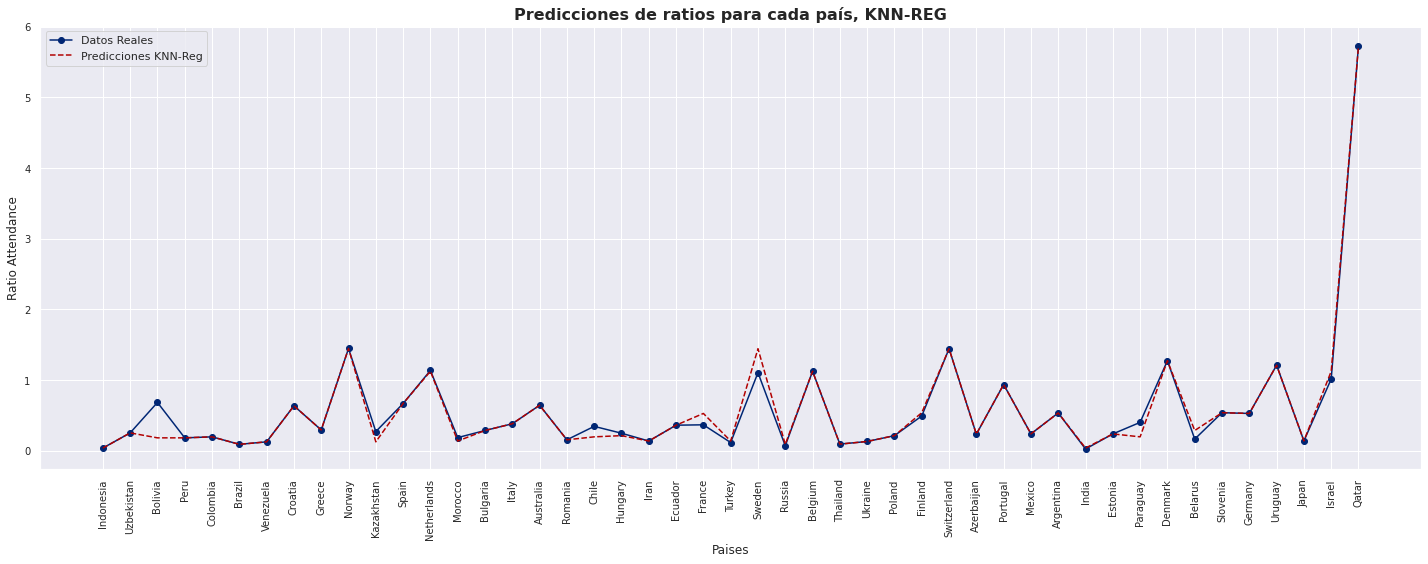

In [ ]:
plt.figure(figsize=(20,8))

sns.set_style('darkgrid')

plt.plot(df1_diff['Country'], df1_diff['ratio_att'], '-o', color="#002674")
plt.plot(df1_diff['Country'], knn.predict(scaler.transform(X)), '--', color="#B20000")
plt.legend(["Datos Reales", "Predicciones KNN-Reg"], loc="best")
plt.ylabel("Ratio Attendance", fontsize=12)
plt.xlabel("Paises", fontsize=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.title("Predicciones de ratios para cada país, KNN-REG", fontweight="bold", fontsize=16)

plt.tight_layout()
plt.savefig("predict-knn.png", dpi = 300)
plt.show()

Se observa en el gráfico que los resultados son bastante buenos para casi todos los países.

## Decision Tree Regresor

In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
X_train

array([[ 1.06922212e+00,  1.18249343e-01, -3.33727629e-01,
        -4.38273890e-01, -1.85234127e+00,  2.21924604e-01,
        -4.74132497e-01, -3.03592995e-01, -7.09590301e-01,
        -2.86447834e-01, -3.15293691e-01,  3.28169508e-01,
        -1.41014949e+00,  1.17861984e+00, -1.35575182e+00,
        -6.16485452e-01, -1.02166946e+00,  1.16328442e+00,
        -5.93828425e-01,  1.72418490e+00, -7.17820241e-01],
       [ 3.25072210e-01, -3.12643172e-01,  4.43900751e-01,
        -3.87471030e-01,  2.28624686e-02,  1.93078179e-01,
        -6.28852597e-01, -2.59434014e-01, -1.11958207e+00,
         9.59941677e-01,  1.48264404e+00, -1.18580282e+00,
        -7.55941372e-01, -4.67719654e-02, -6.06683928e-01,
         2.29178359e-01,  1.43404780e+00, -1.19866485e+00,
         1.78768714e+00, -3.76985530e-01, -3.16276875e-01],
       [-5.62738512e-01, -3.80720969e-01, -4.06903333e-01,
        -3.36668171e-01, -3.28088457e+00,  4.06407554e-01,
        -1.02532286e+00, -2.70473759e-01, -1.02540240e

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state = 123)
dt_regressor.fit(X_train, y_train)
y_pred=dt_regressor.predict(X_test)
y_pred

array([0.29444077, 0.23861068, 1.1365882 , 1.21068832, 0.36213297,
       0.23918207, 0.53871297, 0.16496631, 1.21068832, 1.1365882 ,
       0.63629804, 0.19714158, 1.21068832, 0.3821032 , 0.09430372])

In [ ]:
r2=r2_score(y_test, y_pred)
print(r2)

0.18145639821865078


In [ ]:
ratios_pred = dt_regressor.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred']=ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.038166,0.000000
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.253084,0.000000
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.362133,0.321811
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.239182,0.056231
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.197142,0.000000


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.038166,0.000000,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.253084,0.000000,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.362133,0.321811,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.239182,0.056231,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.197142,0.000000,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.038166,0.000000,0.586193,178
30,Finland,WESTERN EUROPE,5231372,0.492032,0.492032,0.000000,0.231943,46
37,Estonia,BALTICS,1324333,0.238611,0.238611,0.000000,0.171681,88
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.131511,0.000000,0.237481,27
27,Thailand,ASIA (EX. NEAR EAST),64631595,0.094304,0.094304,0.000000,0.243671,118
25,Russia,C.W. OF IND. STATES,142893540,0.071067,0.071067,0.000000,0.256132,23
38,Paraguay,LATIN AMER. & CARIB,6506464,0.401908,0.401908,0.000000,0.155352,43
40,Belarus,C.W. OF IND. STATES,10293011,0.164966,0.164966,0.000000,0.143453,64
41,Slovenia,EASTERN EUROPE,2010347,0.538713,0.538713,0.000000,0.141346,54
21,Ecuador,LATIN AMER. & CARIB,13547510,0.362133,0.362133,0.000000,0.274979,13


In [ ]:
df1_diff['diff'].sum()

8.390138386549506

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.17851358269254267

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.474830520722291

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.6890794734443125

## Decision Tree Regresor-SELECCIÓN DE VARIABLES



In [ ]:
X = df1.loc[:,['Net migration', 'Industry', 'GDP', 'Coastline', 'Phones', 'Home_Away_Contrast']]
y = df1['ratio_att']

X

,Net migration,Industry,GDP,Coastline,Phones,Home_Away_Contrast
0,0.00,0.458,3200.0,2.85,52.0,0.586193
1,-1.72,0.229,1700.0,0.00,62.9,0.486008
2,-1.32,0.352,2400.0,0.00,71.9,0.469158
3,-1.05,0.270,5100.0,0.19,79.5,0.452637
4,-0.31,0.342,6300.0,0.28,176.2,0.394573
5,-0.03,0.400,7600.0,0.09,225.3,0.382696
6,-0.04,0.419,4800.0,0.31,140.1,0.378459
7,1.58,0.308,10600.0,10.32,420.4,0.355599
8,2.35,0.213,20000.0,10.37,589.7,0.348779
9,1.74,0.415,37800.0,7.77,461.7,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
X_train

array([[-1.85234127, -1.02166946, -0.4741325 , -0.43827389, -0.7095903 ,
        -0.71782024],
       [ 0.02286247,  1.4340478 , -0.6288526 , -0.38747103, -1.11958207,
        -0.31627688],
       [-3.28088457, -0.306543  , -1.02532286, -0.33666817, -1.0254024 ,
        -0.0272161 ],
       [-0.35448859,  0.30063984, -0.95763281, -0.45732496, -1.50588794,
         0.33214491],
       [-0.0079417 , -1.72330296, -0.88994277, -0.58750729, -1.45626032,
        -1.13170466],
       [-0.0271943 ,  0.20618917, -0.66753262, -0.55893068, -0.62330592,
         0.16828359],
       [ 0.86227605, -0.52243024,  1.32448868, -0.37477032,  2.03289937,
        -1.36315046],
       [-0.09650368,  0.09824556, -0.73522267, -0.49860229, -0.74004361,
         1.07696477],
       [-0.12730785,  1.58247028, -0.82225272, -0.44144907, -0.26801732,
        -0.37342323],
       [-1.74067616, -0.41448662, -0.60951258, -0.48590157,  0.16284061,
         0.2939101 ],
       [-1.26706207,  0.69193544, -0.73522267, -0.

In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state = 123)
dt_regressor.fit(X_train, y_train)
y_pred=dt_regressor.predict(X_test)
y_pred

array([0.3821032 , 0.3821032 , 1.44746488, 1.21068832, 0.19714158,
       0.25308405, 1.21068832, 0.27157708, 0.49203154, 0.6439966 ,
       0.66887236, 0.40190801, 1.21068832, 0.13967124, 0.40190801])

In [ ]:
r2=r2_score(y_test, y_pred)
print(r2)

0.11197829880773769


In [ ]:
ratios_pred = dt_regressor.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred']=ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.038166,0.000000
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.253084,0.000000
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.197142,0.486802
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.253084,0.070133
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.197142,0.000000


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.038166,0.000000,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.253084,0.000000,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.197142,0.486802,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.253084,0.070133,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.197142,0.000000,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.038166,0.000000,0.586193,178
38,Paraguay,LATIN AMER. & CARIB,6506464,0.401908,0.401908,0.000000,0.155352,43
31,Switzerland,WESTERN EUROPE,7523934,1.444324,1.444324,0.000000,0.209571,12
30,Finland,WESTERN EUROPE,5231372,0.492032,0.492032,0.000000,0.231943,46
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.131511,0.000000,0.237481,27
27,Thailand,ASIA (EX. NEAR EAST),64631595,0.094304,0.094304,0.000000,0.243671,118
40,Belarus,C.W. OF IND. STATES,10293011,0.164966,0.164966,0.000000,0.143453,64
25,Russia,C.W. OF IND. STATES,142893540,0.071067,0.071067,0.000000,0.256132,23
41,Slovenia,EASTERN EUROPE,2010347,0.538713,0.538713,0.000000,0.141346,54
42,Germany,WESTERN EUROPE,82422299,0.528182,0.528182,0.000000,0.130284,4


In [ ]:
df1_diff['diff'].sum()

10.580330200476169

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.22511340852076955

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.5151342040572827

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.7177285030269334

## Decision Tree Regresor-OPTIMIZADO



In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
r2=0
k=1
aux=0
aux1=0
while(r2<=0.25):
  X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  X_val = scaler.transform(X_val)
  X = scaler.transform(X)
  dt_regressor = DecisionTreeRegressor(max_depth=k)
  dt_regressor.fit(X_train, y_train)
  y_pred = dt_regressor.predict(X_test)
  r2=r2_score(y_test, y_pred)
  print(r2)
  if (r2==aux):
    aux1=aux1+1
  aux=r2
  if (aux1==2):
    k=k+1
    aux1=0
  if (k==len(X_train)):
    break
  print(r2)

-0.5719301994727488
-0.5719301994727488
-0.17034733814628966
-0.17034733814628966
0.1718069546444707
0.1718069546444707
-0.7480667903503042
-0.7480667903503042
-1.297492261284777
-1.297492261284777
-0.09595747770038532
-0.09595747770038532
-0.007206703145107518
-0.007206703145107518
-0.002143650866832658
-0.002143650866832658
-0.010393971867741714
-0.010393971867741714
-0.3628580115324276
-0.3628580115324276
-0.16215404464756555
-0.16215404464756555
-0.2852873407668668
-0.2852873407668668
-0.16190733240318322
-0.16190733240318322
-0.04713038355484844
-0.04713038355484844
-0.05572920641438128
-0.05572920641438128
-0.8393919059360717
-0.8393919059360717
-0.5477320625626547
-0.5477320625626547
-0.05122280135124724
-0.05122280135124724
-0.40535669548354525
-0.40535669548354525
-0.44600902556891375
-0.44600902556891375
-2.0547556752781913
-2.0547556752781913
-0.15377351885940604
-0.15377351885940604
-0.05469756582279506
-0.05469756582279506
-0.04758848170700225
-0.04758848170700225
-0.54991

In [ ]:
y_pred=dt_regressor.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

-0.05419857875630707


In [ ]:
ratios_pred = dt_regressor.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred'] = ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.247262,0.209096
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.247262,0.005822
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.247262,0.436682
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.247262,0.064310
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.247262,0.050120


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.247262,0.209096,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.247262,0.005822,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.247262,0.436682,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.247262,0.064310,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.247262,0.050120,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.247262,0.005822,0.486008,74
34,Mexico,LATIN AMER. & CARIB,107449525,0.239182,0.247262,0.008080,0.200180,22
37,Estonia,BALTICS,1324333,0.238611,0.247262,0.008651,0.171681,88
32,Azerbaijan,C.W. OF IND. STATES,7961619,0.235002,0.247262,0.012259,0.208904,112
10,Kazakhstan,C.W. OF IND. STATES,15233244,0.271577,0.247262,0.024315,0.334471,125
29,Poland,EASTERN EUROPE,38536869,0.214081,0.247262,0.033181,0.233011,31
14,Bulgaria,EASTERN EUROPE,7385367,0.286919,0.247262,0.039657,0.309760,70
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.247262,0.050120,0.394573,8
13,Morocco,NORTHERN AFRICA,33241259,0.186365,0.247262,0.060897,0.313902,81
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.247262,0.064310,0.452637,42


In [ ]:
df1_diff['diff'].sum()

15.48016523966474

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.3293652178652072

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.6089311895587648

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.7803404318364933

## Random Forest Regresor

In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

Se separan los datos en 70% para entrenamiento y 30% para testeo.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)
X_train

array([[ 1.06922212e+00,  1.18249343e-01, -3.33727629e-01,
        -4.38273890e-01, -1.85234127e+00,  2.21924604e-01,
        -4.74132497e-01, -3.03592995e-01, -7.09590301e-01,
        -2.86447834e-01, -3.15293691e-01,  3.28169508e-01,
        -1.41014949e+00,  1.17861984e+00, -1.35575182e+00,
        -6.16485452e-01, -1.02166946e+00,  1.16328442e+00,
        -5.93828425e-01,  1.72418490e+00, -7.17820241e-01],
       [ 3.25072210e-01, -3.12643172e-01,  4.43900751e-01,
        -3.87471030e-01,  2.28624686e-02,  1.93078179e-01,
        -6.28852597e-01, -2.59434014e-01, -1.11958207e+00,
         9.59941677e-01,  1.48264404e+00, -1.18580282e+00,
        -7.55941372e-01, -4.67719654e-02, -6.06683928e-01,
         2.29178359e-01,  1.43404780e+00, -1.19866485e+00,
         1.78768714e+00, -3.76985530e-01, -3.16276875e-01],
       [-5.62738512e-01, -3.80720969e-01, -4.06903333e-01,
        -3.36668171e-01, -3.28088457e+00,  4.06407554e-01,
        -1.02532286e+00, -2.70473759e-01, -1.02540240e

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=15, random_state = 77)
rf_regressor.fit(X_train, y_train)
y_pred=rf_regressor.predict(X_test)
y_pred

array([0.51091759, 0.51070277, 0.97340954, 0.35367413, 0.33440714,
       0.27145877, 0.31265973, 0.26666394, 0.70472207, 0.78379176,
       0.42243019, 0.2007683 , 0.76478084, 0.51779652, 0.19443007])

In [ ]:
r2=r2_score(y_test, y_pred)
print(r2)

0.05563182550498835


In [ ]:
ratios_pred = rf_regressor.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred'] = ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.087504,0.049338
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.240848,0.012236
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.334407,0.349536
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.271459,0.088507
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.229456,0.032314


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.087504,0.049338,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.240848,0.012236,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.334407,0.349536,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.271459,0.088507,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.229456,0.032314,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
20,Iran,ASIA (EX. NEAR EAST),68688433,0.137840,0.137341,0.000499,0.277552,44
10,Kazakhstan,C.W. OF IND. STATES,15233244,0.271577,0.274521,0.002944,0.334471,125
13,Morocco,NORTHERN AFRICA,33241259,0.186365,0.180083,0.006282,0.313902,81
18,Chile,LATIN AMER. & CARIB,16134219,0.345477,0.352858,0.007381,0.293818,5
28,Ukraine,C.W. OF IND. STATES,46710816,0.131511,0.139170,0.007658,0.237481,27
34,Mexico,LATIN AMER. & CARIB,107449525,0.239182,0.247205,0.008023,0.200180,22
42,Germany,WESTERN EUROPE,82422299,0.528182,0.516906,0.011276,0.130284,4
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.240848,0.012236,0.486008,74
14,Bulgaria,EASTERN EUROPE,7385367,0.286919,0.300579,0.013661,0.309760,70
30,Finland,WESTERN EUROPE,5231372,0.492032,0.509217,0.017185,0.231943,46


In [ ]:
df1_diff['diff'].sum()

10.726854290458345

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.22823094235017755

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.5574359757785281

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.7466163511325801

## Random Forest Regresor-OPTIMIZADO

In [ ]:
X = df1.drop(columns=['Country', 'Region', 'ratio_att'])
y = df1['ratio_att']

X

,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,...,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast
0,245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,...,81.45,2.000000,20.34,6.25,0.134,0.458,0.408,178,9368.0,0.586193
1,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,...,88.34,1.000000,26.36,7.84,0.342,0.229,0.430,74,6911.0,0.486008
2,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,...,97.14,1.500000,23.30,7.53,0.128,0.352,0.520,72,6148.0,0.469158
3,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,79.5,2.89,...,96.71,1.500000,20.48,6.23,0.080,0.270,0.650,42,5178.0,0.452637
4,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,176.2,2.42,...,95.91,2.000000,20.48,5.58,0.125,0.342,0.533,8,8594.0,0.394573
5,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,...,92.15,2.000000,16.56,6.17,0.084,0.400,0.516,6,17160.0,0.382696
6,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,...,96.13,2.000000,18.71,4.92,0.040,0.419,0.541,75,3255.0,0.378459
7,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,...,71.65,3.125000,9.61,11.48,0.070,0.308,0.622,18,2860.0,0.355599
8,10688058,131940,81.0,10.37,2.35,5.53,20000.0,97.5,589.7,21.10,...,70.12,3.000000,9.68,10.24,0.054,0.213,0.733,39,3147.0,0.348779
9,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,...,97.13,3.000000,11.46,9.40,0.021,0.415,0.564,51,6674.0,0.338870


In [ ]:
r2=0
k=1
aux=0
aux1=0
while(r2<=0.7):
  X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
  X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  X_val = scaler.transform(X_val)
  X = scaler.transform(X)
  rf_regressor = RandomForestRegressor(max_depth=k)
  rf_regressor.fit(X_train, y_train)
  y_pred = rf_regressor.predict(X_test)
  r2=r2_score(y_test, y_pred)
  print(r2)
  if (r2==aux):
    aux1=aux1+1
  aux=r2
  if (aux1==2):
    k=k+1
    aux1=0
  if (k==len(X_train)):
    break
  print(r2)

0.0326871978997324
0.0326871978997324
0.02475797306871863
0.02475797306871863
-0.08765568262947565
-0.08765568262947565
0.08413713200250028
0.08413713200250028
0.045770185262837715
0.045770185262837715
-0.12149079055775847
-0.12149079055775847
-0.03308195091181387
-0.03308195091181387
0.06292735117268289
0.06292735117268289
0.1503813066660511
0.1503813066660511
0.23261633964502393
0.23261633964502393
-2.5202371488169772
-2.5202371488169772
-0.34661000380651696
-0.34661000380651696
-0.016128849221121788
-0.016128849221121788
0.16653948408126118
0.16653948408126118
-0.061887877871173336
-0.061887877871173336
0.1397144449884682
0.1397144449884682
0.0832302719031941
0.0832302719031941
0.27906022075340753
0.27906022075340753
0.1951195055632562
0.1951195055632562
0.023662212348625755
0.023662212348625755
-0.13319276917670275
-0.13319276917670275
0.12168839778867269
0.12168839778867269
-0.03590965536951729
-0.03590965536951729
0.07981345768530324
0.07981345768530324
-0.19424694782395457
-0.19

In [ ]:
y_pred=rf_regressor.predict(X_val)
r2=r2_score(y_val, y_pred)
print(r2)

-0.25681308466546726


In [ ]:
ratios_pred = rf_regressor.predict(X)

In [ ]:
df_aux = df1.copy(deep=True)
df_aux['ratio_att_pred'] = ratios_pred

In [ ]:
df_aux['diff'] = abs(df_aux['ratio_att'] - df_aux['ratio_att_pred'])
df_aux.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,...,Deathrate,Agriculture,Industry,Service,FIFA_Rank,Attendance,Home_Away_Contrast,ratio_att,ratio_att_pred,diff
0,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,...,6.25,0.134,0.458,0.408,178,9368.0,0.586193,0.038166,0.307958,0.269792
1,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,...,7.84,0.342,0.229,0.430,74,6911.0,0.486008,0.253084,0.307958,0.054874
2,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,...,7.53,0.128,0.352,0.520,72,6148.0,0.469158,0.683944,0.315428,0.368515
3,Peru,LATIN AMER. & CARIB,28302603,1285220,22.0,0.19,-1.05,31.94,5100.0,90.9,...,6.23,0.080,0.270,0.650,42,5178.0,0.452637,0.182951,0.307958,0.125007
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,38.3,0.28,-0.31,20.97,6300.0,92.5,...,5.58,0.125,0.342,0.533,8,8594.0,0.394573,0.197142,0.315798,0.118657


In [ ]:
df1_diff= df_aux.loc[:,['Country', 'Region', 'Population', 'ratio_att', 'ratio_att_pred', 'diff', 'Home_Away_Contrast', 'FIFA_Rank']]
df1_diff.head()

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
0,Indonesia,ASIA (EX. NEAR EAST),245452739,0.038166,0.307958,0.269792,0.586193,178
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.307958,0.054874,0.486008,74
2,Bolivia,LATIN AMER. & CARIB,8989046,0.683944,0.315428,0.368515,0.469158,72
3,Peru,LATIN AMER. & CARIB,28302603,0.182951,0.307958,0.125007,0.452637,42
4,Colombia,LATIN AMER. & CARIB,43593035,0.197142,0.315798,0.118657,0.394573,8


In [ ]:
df1_diff.sort_values('diff', ascending=True)

,Country,Region,Population,ratio_att,ratio_att_pred,diff,Home_Away_Contrast,FIFA_Rank
42,Germany,WESTERN EUROPE,82422299,0.528182,0.544292,0.016110,0.130284,4
30,Finland,WESTERN EUROPE,5231372,0.492032,0.474950,0.017082,0.231943,46
15,Italy,WESTERN EUROPE,58133509,0.382103,0.357989,0.024114,0.298578,14
14,Bulgaria,EASTERN EUROPE,7385367,0.286919,0.315428,0.028510,0.309760,70
18,Chile,LATIN AMER. & CARIB,16134219,0.345477,0.315798,0.029679,0.293818,5
21,Ecuador,LATIN AMER. & CARIB,13547510,0.362133,0.315798,0.046335,0.274979,13
10,Kazakhstan,C.W. OF IND. STATES,15233244,0.271577,0.318311,0.046734,0.334471,125
1,Uzbekistan,C.W. OF IND. STATES,27307134,0.253084,0.307958,0.054874,0.486008,74
41,Slovenia,EASTERN EUROPE,2010347,0.538713,0.472615,0.066098,0.141346,54
19,Hungary,EASTERN EUROPE,9981334,0.248464,0.315428,0.066965,0.282285,19


In [ ]:
df1_diff['diff'].sum()

14.59625412613101

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

mae(y, ratios_pred)

0.31055859842831934

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, ratios_pred)

0.6709504522953322

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y, ratios_pred))

0.8191156525761989